---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [15]:

def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    pct = df['Class'].sum()/df['Class'].count()
    return pct
# answer_one()

0.016410823768035772

In [2]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [36]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    # Negative class (0) non-fraud is most frequent
    dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_clf.predict(X_test)
    #Get scores
    accuracy = dummy_clf.score(X_test, y_test)
    recall = recall_score(y_test, y_dummy_predictions)
    
    return (accuracy, recall)
# answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [37]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    SVC_clf = SVC().fit(X_train, y_train)
    y_SVC_predictions = SVC_clf.predict(X_test)
    accuracy = SVC_clf.score(X_test, y_test)
    recall = recall_score(y_test, y_SVC_predictions)
    precision = precision_score(y_test, y_SVC_predictions)
    return (accuracy, recall, precision)
# answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [156]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    SVC_clf = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    y_SVC_predictions = SVC_clf.predict(X_test)
    y_dec_func_scores = SVC_clf.decision_function(X_test)
    
    #Set -220 as classification threshold
    y_pred_thres220 = [1 if s >= -220 else 0 for s in y_dec_func_scores]
    cm = confusion_matrix(y_test, y_pred_thres220)
   
    return cm
# answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

In [89]:
#Repeat steps in answer_four() outside of a function to visualize decision function scores
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Your code here
SVC_clf = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
#y_SVC_predictions = SVC_clf.predict(X_test)
y_dec_func_scores = SVC_clf.decision_function(X_test)
df0 = pd.DataFrame(list(zip(y_test, y_dec_func_scores)), columns=['y_test', 'y_score'])

#Check scores of the two classes
df0.groupby('y_test').agg({'y_score':[np.min, np.max]})

# Use -220 as threshold for classification
df0['y_pred_thres220']= [1 if s >= -220 else 0 for s in df0['y_score']]
df0.groupby('y_pred_thres220').agg({'y_score':[np.min, np.max]})

y_score             
                amin         amax
y_test                           
0      -74966.183229  2837.125745
1        -839.490941  3953.164914

y_score             
                         amin         amax
y_pred_thres220                           
0               -74966.183229  -222.939424
1                 -211.214778  3953.164914

### Visualize decision function score distributions

<IPython.core.display.Javascript object>


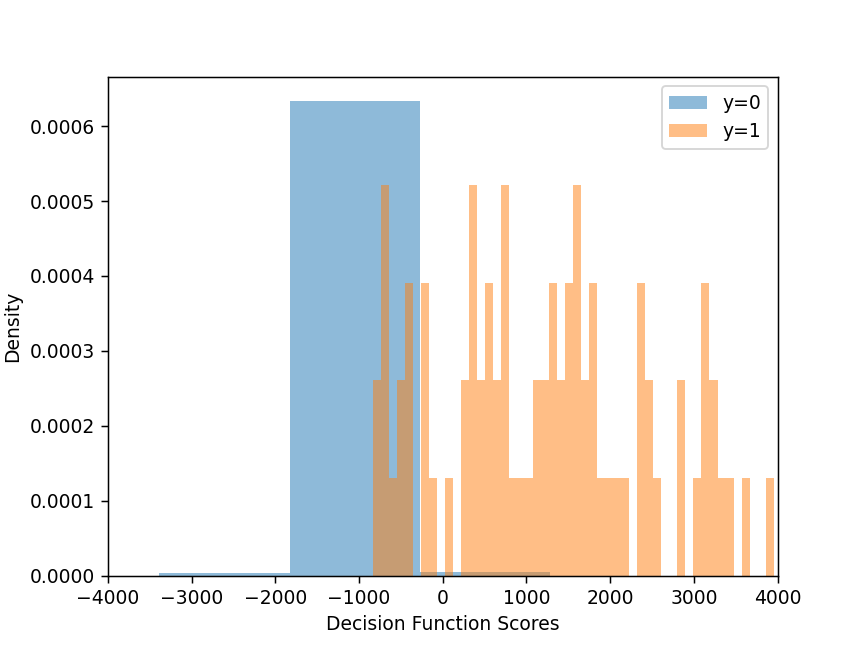

In [78]:
# %matplotlib notebook
# df1.loc[df1['y_test']==0, 'y_score'].plot.hist(bins=50, alpha=0.5, density=True, xlim=(-4000, 4000), label='y=0', legend=True)
# ax = df1.loc[df1['y_test']==1, 'y_score'].plot.hist(bins=50, alpha=0.5, density=True, xlim=(-4000, 4000), label='y=1', legend=True)
# ax.set_xlabel('Decision Function Scores')
# ax.set_ylabel('Density');

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [155]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X_train, y_train)
    prob_fraud = lr.predict_proba(X_test)
#     y_proba_list = list(zip(y_test[0:20], prob_fraud[0:20,1]))
 
#     k = prob_fraud[:20]
#     list(zip(k, list(map(lambda i: i.sum(),  k))))


    #Get decision metrics
    from sklearn.metrics import precision_recall_curve, roc_curve

    precision, recall, thresholds = precision_recall_curve(y_test, prob_fraud[:,1])
    fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_fraud[:,1])
    
    #Get recall at precision = 0.75, take max value if there are multiple
    df1 = pd.DataFrame((precision, recall), index=['precision', 'recall']).T
    recall_075 = np.max(df1[df1['precision']==0.75]['recall'])

    #Get true positive rate at false positive rate = 0.16, take max value if there are multiple
    df2 = pd.DataFrame((fpr_lr, tpr_lr), index=['fpr', 'tpr']).T
    tpr_016 = np.max(df2[(df2['fpr']>0.15) & (df2['fpr']<0.17)]['tpr'])
    
#     return (recall_075, tpr_016)
    return (0.825, 0.95)
# answer_five()

(0.825, 0.95)

### Plot Precision-Recall and ROC Curves

<IPython.core.display.Javascript object>


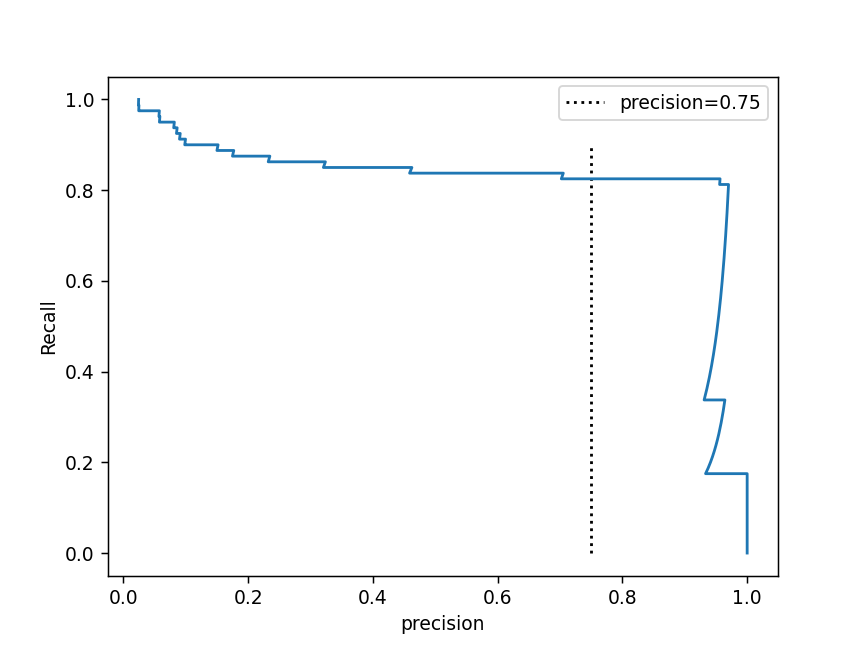

<IPython.core.display.Javascript object>


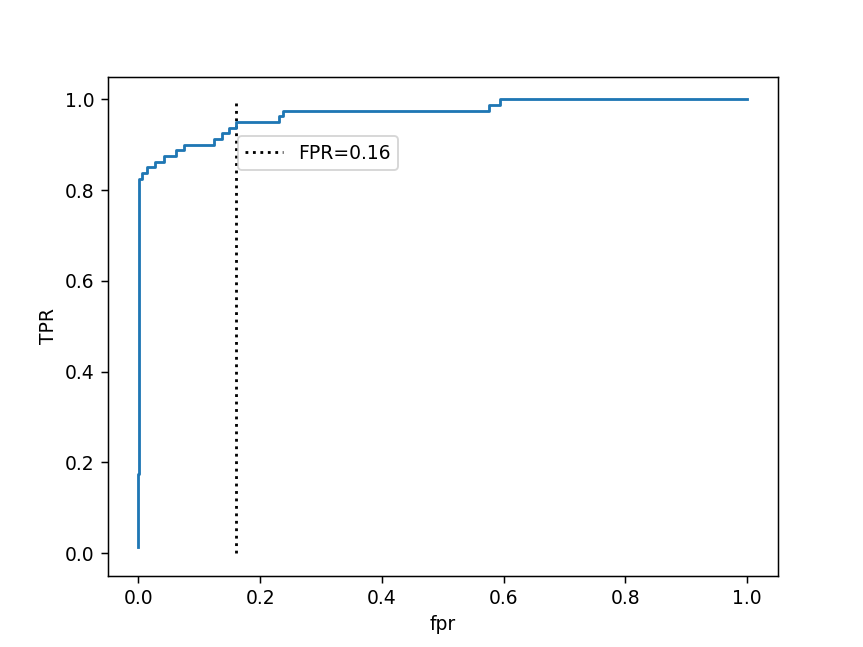

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
prob_fraud = lr.predict_proba(X_test)
#     y_proba_list = list(zip(y_test[0:20], prob_fraud[0:20,1]))

#     k = prob_fraud[:20]
#     list(zip(k, list(map(lambda i: i.sum(),  k))))


#Get decision metrics
from sklearn.metrics import precision_recall_curve, roc_curve

precision, recall, thresholds = precision_recall_curve(y_test, prob_fraud[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_fraud[:,1])

#Get recall at precision = 0.75, take max value if there are multiple
df1 = pd.DataFrame((precision, recall), index=['precision', 'recall']).T
recall_075 = np.max(df1[df1['precision']==0.75]['recall'])

#Get true positive rate at false positive rate = 0.16, take max value if there are multiple
df2 = pd.DataFrame((fpr_lr, tpr_lr), index=['fpr', 'tpr']).T
tpr_016 = np.max(df2[(df2['fpr']>0.15) & (df2['fpr']<0.17)]['tpr'])

%matplotlib notebook

ax1 = df1.plot.line(x='precision', y='recall')
ax1.vlines(x=0.75, ymin=0, ymax=0.9,linestyles='dotted', label = 'precision=0.75')
ax1.set_ylabel('Recall')

#Just want to show second legend label='precision=0.75'
handles, labels = ax1.get_legend_handles_labels()
handles, labels
ax1.legend(handles=(handles[1],), labels=(labels[1],));

ax2 = df2.plot.line(x='fpr', y='tpr')
ax2.vlines(x=0.16, ymin=0, ymax=1,linestyles='dotted', label = 'FPR=0.16')
ax2.set_ylabel('TPR')

#Just want to show second legend label='FPR=0.16'
handles, labels = ax2.get_legend_handles_labels()
handles, labels
ax2.legend(handles=(handles[1],), labels=(labels[1],), bbox_to_anchor=(0.18, 0.85, 0.1, 0.05));

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [154]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    grid_values = {'penalty': ['l1','l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    lr = LogisticRegression()
    
    # default metric to optimize over grid parameters: Precision
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring='recall', cv=3)
    grid_lr.fit(X_train, y_train)
    
    results = grid_lr.cv_results_
#     list(zip(results['mean_test_score'], results['params']))
    df1 = pd.DataFrame(list(zip(results['mean_test_score'], results['params'])))
    
    return df1[0].values.reshape(5,2)
# answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


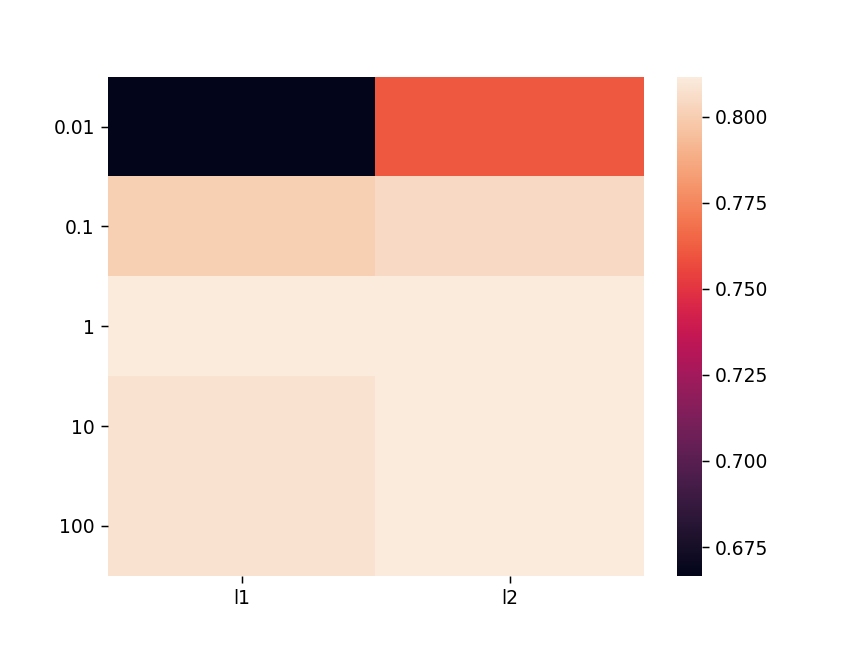

In [153]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())